In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [0]:
# No Headers
# Missing values are encoded as NaN
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

print(df.shape)
df.head()

(204, 26)


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [0]:
# 1. symboling: -3, -2, -1, 0, 1, 2, 3.
# 2. normalized-losses: continuous from 65 to 256.
# 3. make:
# alfa-romero, audi, bmw, chevrolet, dodge, honda,
# isuzu, jaguar, mazda, mercedes-benz, mercury,
# mitsubishi, nissan, peugot, plymouth, porsche,
# renault, saab, subaru, toyota, volkswagen, volvo

# 4. fuel-type: diesel, gas.
# 5. aspiration: std, turbo.
# 6. num-of-doors: four, two.
# 7. body-style: hardtop, wagon, sedan, hatchback, convertible.
# 8. drive-wheels: 4wd, fwd, rwd.
# 9. engine-location: front, rear.
# 10. wheel-base: continuous from 86.6 120.9.
# 11. length: continuous from 141.1 to 208.1.
# 12. width: continuous from 60.3 to 72.3.
# 13. height: continuous from 47.8 to 59.8.
# 14. curb-weight: continuous from 1488 to 4066.
# 15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
# 16. num-of-cylinders: eight, five, four, six, three, twelve, two.
# 17. engine-size: continuous from 61 to 326.
# 18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
# 19. bore: continuous from 2.54 to 3.94.
# 20. stroke: continuous from 2.07 to 4.17.
# 21. compression-ratio: continuous from 7 to 23.
# 22. horsepower: continuous from 48 to 288.
# 23. peak-rpm: continuous from 4150 to 6600.
# 24. city-mpg: continuous from 13 to 49.
# 25. highway-mpg: continuous from 16 to 54.
# 26. price: continuous from 5118 to 45400.


column_headers = ['symboling','normalized-losses', 'make', 'fuel-type','aspiration',
                  'num-of-doors','body-style','drive-wheels','engine-location',
                  'wheel-base','length', 'width','height','curb-weight',
                  'engine-type','num-of-cylinders', 'engine-size','fuel-system',
                  'bore','stroke','compression-ratio','horsepower','peak-rpm',
                  'city-mpg','highway-mpg', 'price']


url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, names=column_headers, na_values='?')

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [0]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# T-tests

What kind of variables do we need in order to be able to run a t-test?

numeric & ordinal 

In [0]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [0]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [0]:
# numeric, but not ordinal. Cannot be sorted / ranked
# This would not work for a t-test
# I can't calculate a mean here.
# numeric values, representing a categorical column.
df['fuel-type'].replace({'gas': 0, 'diesel':1})

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    1
204    0
Name: fuel-type, Length: 205, dtype: int64

In [0]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [0]:
toyota = df[df['make']=='toyota']
nissan = df[df['make']=='nissan']

In [0]:
toyota.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
150,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,1985,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
151,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,38,6338.0
152,1,74.0,toyota,gas,std,four,hatchback,fwd,front,95.7,158.7,63.6,54.5,2015,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,38,6488.0
153,0,77.0,toyota,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37,6918.0
154,0,81.0,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,2290,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,7898.0


In [0]:
nissan.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
89,1,128.0,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,5499.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
91,1,128.0,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,6649.0
92,1,122.0,nissan,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,1938,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,6849.0
93,1,103.0,nissan,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,2024,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7349.0


## 1 Sample T-test

City Miles Per Gallon in Toyota Cars

- in a 1-sample t-test, **you get to pick the null hypothesis value**

Null Hypothesis: $\mu == 20$ - Toyotas get 20 mpg in the city.

Alternative Hypothesis: $\mu \neq 20$ - Toyotas do not get 20mpg in the city, it's some other number.

Confidence Level: 95%
  Critical Value: We will compare our p-value to .05 or (1-.95)


In [0]:
# nan_policy = 'omit' if we have NaNs in the column
stats.ttest_1samp(toyota['city-mpg'], 20)

Ttest_1sampResult(statistic=8.815660918917304, pvalue=5.944360691948699e-10)

Conclusion:

Based on a t-statistic of 8.82 and a p-value of .0000000005944 we will (**reject**/fail to reject) the null hypothesis that toyota cars get 20mpg in the city.

Based on the sign of our t-statistic, we know that toyota city-mpg is likely greater than 20mpg.

In [0]:
toyota['city-mpg'].mean()

27.5

# 2 Sample T-test

Compare city-mpg in toyota vs nissan cars.

Null Hypothesis: Two means are equal. Toyota cars get the same city-mpg as Nissan cars. $\bar{x}_t == \bar{x}_n$

Alternative Hypothesis: The two means are different: $\bar{x}_t \neq \bar{x}_n$

Confidence Level: 95%

In [0]:
stats.ttest_ind(toyota['city-mpg'], nissan['city-mpg'])

Ttest_indResult(statistic=0.2870257657884742, pvalue=0.7753280215681686)

Conclusion: Based on a t-statistic of .287 and a p-value of .775, I (reject/**fail to reject**) the null hypothesis that nissan and toyota cars get the same mileage in the city. (different city-mpg)

In [0]:
toyota['city-mpg'].mean()

27.5

In [0]:
nissan['city-mpg'].mean()

27.0

## P-value interpretation:

The probability of obtaining a sample similar to the observed sample **if the null hypothesis is true**

P-value is the probability that the null hypothesis is true, given our observed sample.

## Handling Column headers after reading in the dataset

In [0]:
df = pd.read_csv(url, header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [0]:
# Work with a dataframe that doesn't have intuitive column headers
df[2]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: 2, Length: 205, dtype: object

In [0]:
df.columns = ['symboling','normalized-losses', 'make', 'fuel-type','aspiration',
                  'num-of-doors','body-style','drive-wheels','engine-location',
                  'wheel-base','length', 'width','height','curb-weight',
                  'engine-type','num-of-cylinders', 'engine-size','fuel-system',
                  'bore','stroke','compression-ratio','horsepower','peak-rpm',
                  'city-mpg','highway-mpg', 'price']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


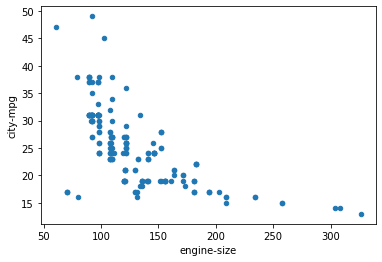

In [0]:
# Scatter plot of engine-size and city-mpg

df.plot.scatter('engine-size', 'city-mpg');

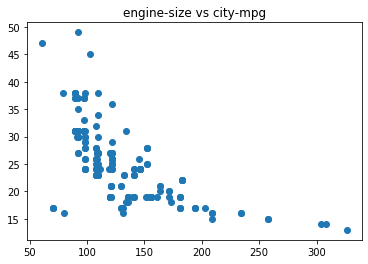

In [0]:
plt.scatter(df['engine-size'], df['city-mpg'])
plt.title('engine-size vs city-mpg')
plt.show()

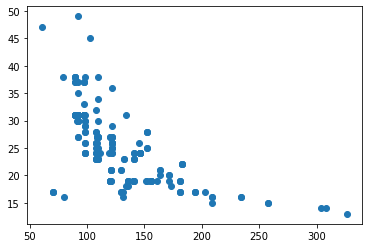

In [0]:
fig, ax = plt.subplots()

ax.scatter(df['engine-size'], df['city-mpg'])

plt.show()

Plotting the mean:

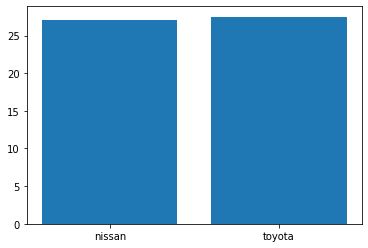

In [0]:
plt.bar(x=[1,2], height=[nissan['city-mpg'].mean(), toyota['city-mpg'].mean()])
plt.xticks(ticks=[1,2], labels=['nissan', 'toyota'])

plt.show()

Confidence Intervals around the means:

In [0]:
def confidence_interval(data, confidence_level=.95):
  data = np.array(data)
  x_bar = np.nanmean(data)
  s = np.std(data, ddof=1)
  n = len(data)
  t = stats.t.ppf((1+confidence_level)/2, n-1)

  standard_error = s / np.sqrt(n)

  margin_of_error = t*standard_error

  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error

  return lower_bound, x_bar, upper_bound, margin_of_error

# stats.confidence(s, n, t, confidence_level)

In [0]:
lower_bound_nissan, mean_nissan, upper_bound_nissan, moe_nissan = confidence_interval(nissan['city-mpg'])

In [0]:
lower_bound_toyota, mean_toyota, upper_bound_toyota, moe_toyota = confidence_interval(toyota['city-mpg'])

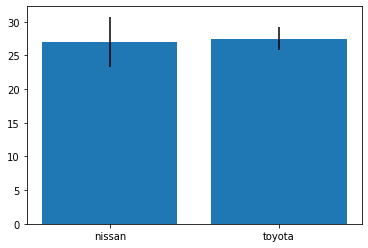

In [0]:
plt.bar(x=[1,2], height=[mean_nissan, mean_toyota], yerr=[moe_nissan, moe_toyota])
plt.xticks(ticks=[1,2], labels=['nissan', 'toyota'])

plt.show()

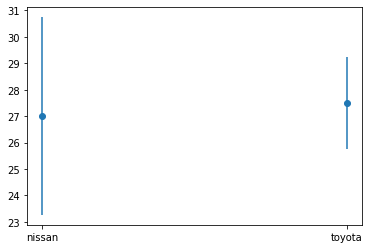

In [0]:
plt.errorbar(x=[1,2], y=[mean_nissan, mean_toyota], yerr=[moe_nissan, moe_toyota], fmt='o')
plt.xticks(ticks=[1,2], labels=['nissan', 'toyota'])

plt.show()

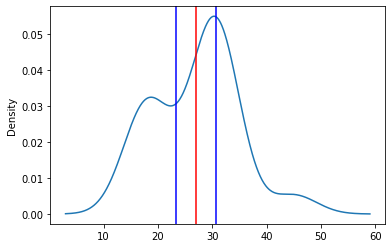

In [0]:
nissan['city-mpg'].plot.density()
plt.axvline(lower_bound_nissan,color='blue')
plt.axvline(mean_nissan, color='red')
plt.axvline(upper_bound_nissan,color='blue')

plt.show()

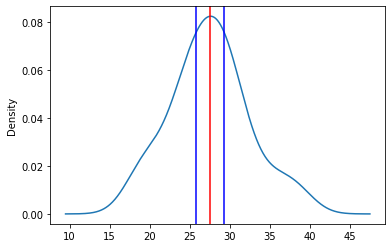

In [0]:
toyota['city-mpg'].plot.density()
plt.axvline(lower_bound_toyota,color='blue')
plt.axvline(mean_toyota, color='red')
plt.axvline(upper_bound_toyota,color='blue')

plt.show()